In [1]:
import numpy
numpy.log2(1.2)

0.2630344058337938

In [2]:
numpy.log10(0.01)

-2.0

In [3]:
import pandas as pd

ttherm_df = pd.read_csv('./tt.csv')

ttherm_df

,Unnamed: 0,logFC,AveExpr,t,P.Value,adj.P.Val,B,negLogPValue
0,TTHERM_01127520,6.690659,7.767126,28.975787,1.738046e-11,1.703019e-07,16.456865,6.768781
1,TTHERM_00056190,5.203817,6.252868,28.805550,1.849421e-11,1.703019e-07,16.407094,6.768781
2,TTHERM_00261850,5.452655,9.897292,27.734807,2.756464e-11,1.703019e-07,16.083683,6.768781
3,TTHERM_00196410,5.811264,7.579225,26.745544,4.039968e-11,1.703019e-07,15.768151,6.768781
4,TTHERM_01338520,4.718828,8.746926,26.424358,4.587431e-11,1.703019e-07,15.662054,6.768781
...,...,...,...,...,...,...,...,...
23655,TTHERM_00191520,0.000098,4.811380,0.000479,9.996263e-01,9.997953e-01,-7.289677,0.000089
23656,TTHERM_00619877,0.000114,12.186715,0.000316,9.997538e-01,9.998806e-01,-7.289677,0.000052
23657,TTHERM_01068180,-0.000044,15.102700,-0.000216,9.998314e-01,9.999159e-01,-7.289677,0.000037
23658,TTHERM_01652016,-0.000044,13.414645,-0.000118,9.999082e-01,9.999275e-01,-7.289677,0.000031


In [4]:
import numpy as np

def probability_from_bstat(b_stat):
    # Calculate odds using exponential function
    odds = np.exp(b_stat)
    
    # Calculate probability of differential expression
    probability = odds / (1 + odds)
    
    return probability

In [5]:
probability_from_bstat(1)

0.7310585786300049

In [6]:
ttherm_df['diff_exp_prob'] = ttherm_df['B'].apply(probability_from_bstat)

In [7]:
ttherm_df.loc[
    (ttherm_df['Unnamed: 0'].isin(['TTHERM_01018540',
'TTHERM_00473020',
'TTHERM_01055600',
'TTHERM_00624730',
'TTHERM_00624720',
'TTHERM_00527180',
'TTHERM_00522600',
'TTHERM_00378890',
'TTHERM_00321730',]))
]

,Unnamed: 0,logFC,AveExpr,t,P.Value,adj.P.Val,B,negLogPValue,diff_exp_prob
5037,TTHERM_01018540,1.283340,14.967231,4.944065,0.000482,0.002264,-0.401125,2.645122,0.401042
7050,TTHERM_00473020,0.913899,15.096574,3.817792,0.003016,0.010120,-2.301385,1.994838,0.091008
8266,TTHERM_00321730,0.935501,5.996553,3.273905,0.007710,0.022065,-3.259021,1.656305,0.037004
14071,TTHERM_00527180,0.237263,15.763545,1.571913,0.145145,0.244040,-6.080455,0.612539,0.002282
15566,TTHERM_00624720,0.180335,15.830153,1.271762,0.230491,0.350319,-6.470176,0.455536,0.001547
18514,TTHERM_00624730,0.112218,15.792016,0.755993,0.466024,0.595525,-6.986634,0.225100,0.000923
18569,TTHERM_00522600,0.115056,15.775699,0.748228,0.470502,0.599465,-6.992671,0.222236,0.000918
21328,TTHERM_01055600,0.049038,15.936676,0.340273,0.740258,0.821122,-7.226986,0.085592,0.000726
22792,TTHERM_00378890,0.018124,15.922759,0.127367,0.901019,0.935292,-7.280853,0.029053,0.000688


In [8]:
ttherm_df.loc[
    (ttherm_df['Unnamed: 0'].isin(['TTHERM_01018540',
'TTHERM_00473020',
'TTHERM_01055600',
'TTHERM_00624730',
'TTHERM_00624720',
'TTHERM_00527180',
'TTHERM_00522600',
'TTHERM_00378890',
'TTHERM_00321730',]))
].to_csv('~/grls.csv')

In [9]:
ttherm_df.loc[
    (ttherm_df['Unnamed: 0'].isin(
[
'TTHERM_00378890',
'TTHERM_00527180',
'TTHERM_00522600',
'TTHERM_00624720',
'TTHERM_00537380',
'TTHERM_01055600',
'TTHERM_00221120',
'TTHERM_00471040',
'TTHERM_00624730',
'TTHERM_01002870',
'TTHERM_00473020',
'TTHERM_01002860',
]
    ))
]

,Unnamed: 0,logFC,AveExpr,t,P.Value,adj.P.Val,B,negLogPValue,diff_exp_prob
6100,TTHERM_00471040,0.794310,15.354026,4.300681,0.001346,0.005220,-1.469043,2.282299,0.187088
6600,TTHERM_00537380,0.965906,14.913944,4.039515,0.002075,0.007437,-1.916428,2.128586,0.128260
7050,TTHERM_00473020,0.913899,15.096574,3.817792,0.003016,0.010120,-2.301385,1.994838,0.091008
7583,TTHERM_01002870,0.550788,15.557526,3.553549,0.004742,0.014795,-2.764957,1.829899,0.059247
12692,TTHERM_00221120,0.321584,15.623353,1.903509,0.084292,0.157123,-5.592849,0.803761,0.003711
14071,TTHERM_00527180,0.237263,15.763545,1.571913,0.145145,0.244040,-6.080455,0.612539,0.002282
15566,TTHERM_00624720,0.180335,15.830153,1.271762,0.230491,0.350319,-6.470176,0.455536,0.001547
16681,TTHERM_01002860,0.158960,15.808957,1.062549,0.311455,0.441735,-6.705603,0.354838,0.001223
18514,TTHERM_00624730,0.112218,15.792016,0.755993,0.466024,0.595525,-6.986634,0.225100,0.000923
18569,TTHERM_00522600,0.115056,15.775699,0.748228,0.470502,0.599465,-6.992671,0.222236,0.000918


In [10]:
ttherm_df.loc[
    (ttherm_df['Unnamed: 0'].isin(
['TTHERM_00046372', 'TTHERM_00537380', 'TTHERM_00473020', 'TTHERM_00038880', 'TTHERM_00527180', 'TTHERM_01002860', 'TTHERM_01055600', 'TTHERM_00378890', 'TTHERM_00624730', 'TTHERM_00624720', 'TTHERM_01002870', 'TTHERM_00471040', 'TTHERM_00522600', 'TTHERM_00221120'
]
    ))
]

,Unnamed: 0,logFC,AveExpr,t,P.Value,adj.P.Val,B,negLogPValue,diff_exp_prob
4360,TTHERM_00038880,1.258277,15.241014,5.453522,0.000223,0.001209,0.405397,2.917595,0.599984
6100,TTHERM_00471040,0.794310,15.354026,4.300681,0.001346,0.005220,-1.469043,2.282299,0.187088
6600,TTHERM_00537380,0.965906,14.913944,4.039515,0.002075,0.007437,-1.916428,2.128586,0.128260
7050,TTHERM_00473020,0.913899,15.096574,3.817792,0.003016,0.010120,-2.301385,1.994838,0.091008
7583,TTHERM_01002870,0.550788,15.557526,3.553549,0.004742,0.014795,-2.764957,1.829899,0.059247
12692,TTHERM_00221120,0.321584,15.623353,1.903509,0.084292,0.157123,-5.592849,0.803761,0.003711
14071,TTHERM_00527180,0.237263,15.763545,1.571913,0.145145,0.244040,-6.080455,0.612539,0.002282
15566,TTHERM_00624720,0.180335,15.830153,1.271762,0.230491,0.350319,-6.470176,0.455536,0.001547
16681,TTHERM_01002860,0.158960,15.808957,1.062549,0.311455,0.441735,-6.705603,0.354838,0.001223
18514,TTHERM_00624730,0.112218,15.792016,0.755993,0.466024,0.595525,-6.986634,0.225100,0.000923


In [11]:
ttherm_df.loc[
    (ttherm_df['Unnamed: 0'].isin(
['TTHERM_00046372', 'TTHERM_00537380', 'TTHERM_00473020', 'TTHERM_00038880', 'TTHERM_00527180', 'TTHERM_01002860', 'TTHERM_01055600', 'TTHERM_00378890', 'TTHERM_00624730', 'TTHERM_00624720', 'TTHERM_01002870', 'TTHERM_00471040', 'TTHERM_00522600', 'TTHERM_00221120'
]
    ))
].shape

(13, 9)

In [12]:
FC = 1.5
logFC = numpy.log2(FC)
adj_P_Val = 0.0005
B = 1

ttherm_df_filtered = ttherm_df.loc[
    (ttherm_df['logFC'] > logFC)
    &
    (ttherm_df['adj.P.Val'] < adj_P_Val)
    &
    (ttherm_df['B'] > B)
].sort_values(by=('B'), ascending=False)

ttherm_df_filtered

,Unnamed: 0,logFC,AveExpr,t,P.Value,adj.P.Val,B,negLogPValue,diff_exp_prob
0,TTHERM_01127520,6.690659,7.767126,28.975787,1.738046e-11,1.703019e-07,16.456865,6.768781,1.000000
1,TTHERM_00056190,5.203817,6.252868,28.805550,1.849421e-11,1.703019e-07,16.407094,6.768781,1.000000
2,TTHERM_00261850,5.452655,9.897292,27.734807,2.756464e-11,1.703019e-07,16.083683,6.768781,1.000000
3,TTHERM_00196410,5.811264,7.579225,26.745544,4.039968e-11,1.703019e-07,15.768151,6.768781,1.000000
4,TTHERM_01338520,4.718828,8.746926,26.424358,4.587431e-11,1.703019e-07,15.662054,6.768781,1.000000
...,...,...,...,...,...,...,...,...,...
3424,TTHERM_00398050,1.119343,10.771853,6.252404,7.150893e-05,4.939858e-04,1.596612,3.306286,0.831544
3426,TTHERM_00499460,1.376162,9.646617,6.248973,7.184545e-05,4.960208e-04,1.591687,3.304500,0.830853
3427,TTHERM_00194535,2.320703,6.870020,6.246755,7.206381e-05,4.973832e-04,1.588503,3.303309,0.830405
3429,TTHERM_00499430,2.130878,6.207094,6.244293,7.230713e-05,4.987251e-04,1.584967,3.302139,0.829907


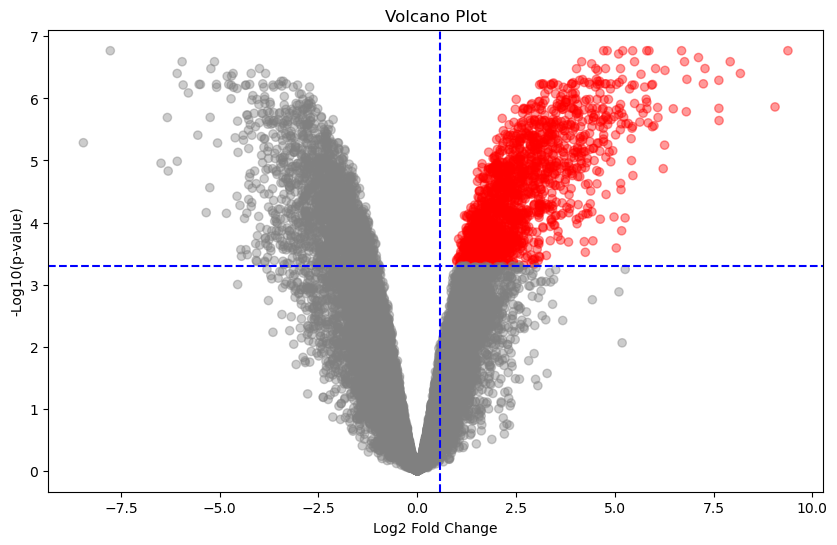

In [13]:
import matplotlib.pyplot as plt

# Define thresholds
fold_change_threshold = logFC  # Threshold for log2 fold change
pvalue_threshold = -np.log10(adj_P_Val)  # Threshold for p-value
b_value_threshold = B

# Create a new figure
plt.figure(figsize=(10, 6))

# Scatter plot: points with different colors for significance
# Color significant points differently
colors = np.where(
    (ttherm_df['logFC'] > fold_change_threshold)
    & 
    (ttherm_df['negLogPValue'] > pvalue_threshold)
    & 
    (ttherm_df['B'] > B), 
    'red', 
    'grey'
)

plt.scatter(
    ttherm_df['logFC'], 
    ttherm_df['negLogPValue'], 
    c=colors, 
    alpha=0.4,
)

# Add labels and title
plt.title('Volcano Plot')
plt.xlabel('Log2 Fold Change')
plt.ylabel('-Log10(p-value)')

# Add horizontal and vertical threshold lines
plt.axhline(y=pvalue_threshold, color='blue', linestyle='--')
plt.axvline(x=fold_change_threshold, color='blue', linestyle='--')

# # Annotate significant genes
# for i, row in ttherm_df.iterrows():
#     if (abs(row['log2FoldChange']) >= fold_change_threshold) and (row['pvalue'] <= pvalue_threshold):
#         plt.text(
#             row['log2FoldChange'], 
#             row['-log10(pvalue)'], 
#             row['Gene'], 
#             fontsize=8,
#             ha='right'
#         )

# Save the figure as an SVG file
plt.savefig('regranulation_volcano_plot.svg', format='svg')

# Show the plot
plt.show()

In [14]:
np.count_nonzero(colors == 'red')

1643

In [15]:
ttherm_df_filtered.to_csv(f'./de_regranulation_FC_{FC}_adj_P_Val_{adj_P_Val}_B_{B}.csv', index=False)

import os
os.path.abspath('./')

'/Users/michaelbertagna/git/TGNE-2022/regranulation'

In [16]:
muco_exp = set([
'TTHERM_00052190',
'TTHERM_00011710',
'TTHERM_00321680',
'TTHERM_00445920',
'TTHERM_00410180',
'TTHERM_00410210',
'TTHERM_00313130',
'TTHERM_00059370',
'TTHERM_00283800',
'TTHERM_00241790',
'TTHERM_00318900',
'TTHERM_00852790',
'TTHERM_00467390',
'TTHERM_01332070',
'TTHERM_00497590',
'TTHERM_00013410',
'TTHERM_00527180',
'TTHERM_00624730',
'TTHERM_00624720',
'TTHERM_00378890',
'TTHERM_00522600',
'TTHERM_01055600',
'TTHERM_00558350',
'TTHERM_00221120',
'TTHERM_00572100',
'TTHERM_00420770',
'TTHERM_00566910',
'TTHERM_00658810',
'TTHERM_00047330',
'TTHERM_000193469',
'TTHERM_000486279',
'TTHERM_00141040',
'TTHERM_00227750',
'TTHERM_00317390',
'TTHERM_00670750',
'TTHERM_01122800',
'TTHERM_01213910',
'TTHERM_00886960',
'TTHERM_01287970',
'TTHERM_00498010',
])

In [17]:
# ttherm_df_filtered = ttherm_df_filtered.loc[
#     (ttherm_df_filtered['diff_exp_prob'] > 0.9)
# ]
# ttherm_df_filtered

In [18]:
print(','.join(list(ttherm_df_filtered['Unnamed: 0'].values)))

TTHERM_01127520,TTHERM_00056190,TTHERM_00261850,TTHERM_00196410,TTHERM_01338520,TTHERM_00516395,TTHERM_00188500,TTHERM_00558440,TTHERM_00481170,TTHERM_00822150,TTHERM_00239350,TTHERM_01014580,TTHERM_00285550,TTHERM_01002630,TTHERM_00227130,TTHERM_00011660,TTHERM_00666210,TTHERM_01043140,TTHERM_00480150,TTHERM_00516330,TTHERM_01084400,TTHERM_00989430,TTHERM_00845880,TTHERM_01161080,TTHERM_00532720,TTHERM_00999152,TTHERM_00600240,TTHERM_01143870,TTHERM_00339900,TTHERM_01080440,TTHERM_00730330,TTHERM_00402020,TTHERM_00194210,TTHERM_00137740,TTHERM_00256990,TTHERM_00047020,TTHERM_00462890,TTHERM_00299979,TTHERM_00348960,TTHERM_00133760,TTHERM_00320460,TTHERM_01312368,TTHERM_01043130,TTHERM_00437690,TTHERM_00290740,TTHERM_00040350,TTHERM_00545770,TTHERM_00301830,TTHERM_00842410,TTHERM_00624120,TTHERM_00338350,TTHERM_01349994,TTHERM_00361750,TTHERM_01495770,TTHERM_00467430,TTHERM_00713420,TTHERM_00085580,TTHERM_00815160,TTHERM_00261790,TTHERM_00193820,TTHERM_00522740,TTHERM_01097960,TTHERM_0

In [19]:
# len(inter)

In [20]:
# print(','.join(inter))

In [21]:
# import requests
# from bs4 import BeautifulSoup

# def extract_descriptions_from_html(url):
#     try:
#         # Get the HTML content of the web page
#         response = requests.get(url)
#         response.raise_for_status()  # Check if the request was successful
#         html_content = response.content

#         # Parse the HTML content using BeautifulSoup
#         soup = BeautifulSoup(html_content, 'html.parser')

#         # Find the specific table with class 'main'
#         table = soup.find('table', class_='main')
#         if table:
#             # Find all rows in the table, skipping the header row
#             rows = table.find_all('tr')[1:]  # Skip the header row
#             descriptions = []

#             for row in rows:
#                 # Find all cells in the row
#                 cells = row.find_all('td')
#                 if len(cells) >= 4:
#                     description_text = cells[3].get_text(strip=True)
#                     descriptions.append(description_text)
            
#             if descriptions:
#                 for idx, description in enumerate(descriptions, 1):
#                     print(f"Description {idx}: {description}")
#             else:
#                 print("No descriptions found.")
#         else:
#             print("Table not found in the HTML.")

#     except requests.exceptions.RequestException as e:
#         print(f"An error occurred while fetching the HTML content: {e}")

# for gene in inter:
#     url = f"https://tet.ciliate.org/search.php?gene_name={gene}"  # Replace with the actual URL
#     extract_descriptions_from_html(url)

In [22]:
import scipy.stats as stats

# Total number of genes in the entire dataset
N = 20000

# Total number of specific genes you are interested in
K = 50

# Number of genes randomly selected
n = 5000

# Number of specific genes found in the selected set
k = 50

# Hypergeometric test
p_value = stats.hypergeom.sf(k-1, N, K, n)

print(f"The p-value is: {p_value}")

The p-value is: 6.559457458892222e-31


In [23]:
import scipy.stats as stats

# Example 2x2 contingency table
#           | Present | Absent |
# Condition |    a    |    b   |
# Control   |    c    |    d   |
a = 78
b = 1300
c = 16000
d = 16000

table = [[a, b], [c, d]]

# Two-tailed test (default)
oddsratio, p_value_two_tailed = stats.fisher_exact(table, alternative='two-sided')
print(f"Two-tailed p-value: {p_value_two_tailed}")

# One-tailed test (greater)
oddsratio, p_value_greater = stats.fisher_exact(table, alternative='greater')
print(f"One-tailed p-value (greater): {p_value_greater}")

# One-tailed test (less)
oddsratio, p_value_less = stats.fisher_exact(table, alternative='less')
print(f"One-tailed p-value (less): {p_value_less}")

Two-tailed p-value: 6.555352598579253e-277
One-tailed p-value (greater): 1.0
One-tailed p-value (less): 5.971977437724528e-277


In [24]:
from scipy.stats import chi2_contingency

# Create a 2x2 contingency table (example data)
# Replace with your actual observed counts
a = 78
b = 1300
c = 20000
d = 20000

observed = [[a, b], [c, d]]

# Perform Chi-squared test
chi2_stat, p_val, dof, expected = chi2_contingency(observed)

# Print the results
print("Chi-squared Statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)

Chi-squared Statistic: 1046.7116189215628
P-value: 1.2620381730596847e-229
Degrees of Freedom: 1
Expected Frequencies:
[[  668.65203731   709.34796269]
 [19409.34796269 20590.65203731]]


In [25]:
all_ttherm_df = pd.read_csv('../TGNE/embedding/rna_seq_label_df_round_1.csv')

In [26]:
# counts = []

# for i in range(10000):
#     counts.append(len(set(all_ttherm_df.sample(4000)['TTHERM_ID'].values).intersection(set(inter))))

In [27]:
# import matplotlib.pyplot as plt

# plt.hist(counts, 10)
# plt.show()

In [28]:
import scipy.stats as stats

# Example 2x2 contingency table
#           | Present | Absent |
# Condition |    a    |    b   |
# Control   |    c    |    d   |
a = 26
b = 1934
c = 13
d = 17027

table = [[a, b], [c, d]]

# Two-tailed test (default)
oddsratio, p_value_two_tailed = stats.fisher_exact(table, alternative='two-sided')
print(f"Two-tailed p-value: {p_value_two_tailed}")

Two-tailed p-value: 4.1016327983861445e-17


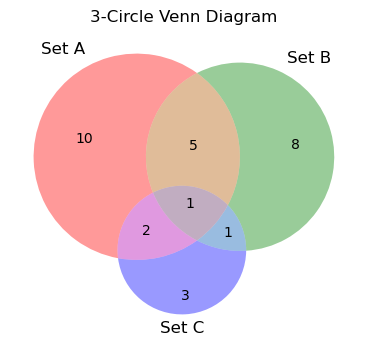

In [29]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

plt.figure(figsize=(8, 4))
venn3(subsets=(10, 8, 5, 3, 2, 1, 1), set_labels=('Set A', 'Set B', 'Set C'))
plt.title("3-Circle Venn Diagram")
plt.show()

In [30]:
rna_seq_ev_enriched_df = pd.read_csv('../TGNE/embedding/rna_seq_ev_enriched_module_genes.csv')

In [31]:
microarray_ev_enriched_df = pd.read_csv('../TGNE/embedding/microarray_ev_enriched_module_genes.csv')

In [32]:
# import matplotlib.pyplot as plt
# from venn import venn

# # Define the sets
# sets = {
#     'Upregulated': set(ttherm_df_filtered['Unnamed: 0'].values),
#     'Enriched Microarray Clusters': set(microarray_ev_enriched_df['TTHERM_ID'].values),
#     'Enriched RNA-seq Clusters': set(rna_seq_ev_enriched_df['TTHERM_ID'].values),
# }

# # Create the Venn diagram
# v = venn(sets, legend_loc='upper center', ax=None, figsize=(10, 50))

# plt.savefig('muco_venn.svg', format='svg')

# plt.show()

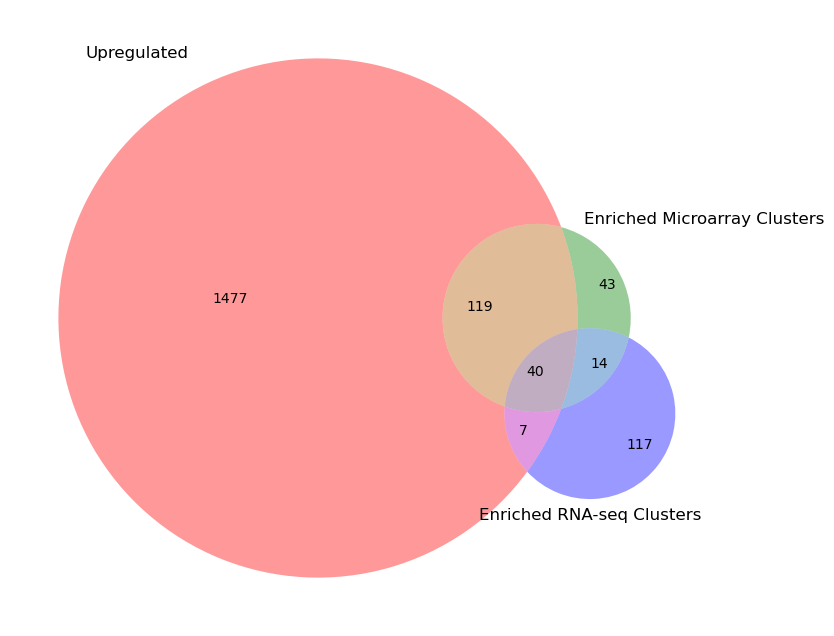

In [33]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# Define the sets
sets = {
    'Upregulated': set(ttherm_df_filtered['Unnamed: 0'].values),
    'Enriched Microarray Clusters': set(microarray_ev_enriched_df['TTHERM_ID'].values),
    'Enriched RNA-seq Clusters': set(rna_seq_ev_enriched_df['TTHERM_ID'].values),
}

# Create the Venn diagram with specified figure size
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the figsize here as needed

# Create a 3-set Venn diagram
v = venn3([sets['Upregulated'], sets['Enriched Microarray Clusters'], sets['Enriched RNA-seq Clusters']],
          ('Upregulated', 'Enriched Microarray Clusters', 'Enriched RNA-seq Clusters'),
          ax=ax)

# Save the plot in SVG format
plt.savefig('muco_venn.svg', format='svg')

# Display the plot
plt.show()

In [34]:
intersection_all = (set(ttherm_df_filtered['Unnamed: 0'].values).intersection(set(microarray_ev_enriched_df['TTHERM_ID'].values)).intersection(set(rna_seq_ev_enriched_df['TTHERM_ID'].values)))

In [35]:
intersection_all = (set(ttherm_df_filtered['Unnamed: 0'].values).intersection(set(microarray_ev_enriched_df['TTHERM_ID'].values)).intersection(set(rna_seq_ev_enriched_df['TTHERM_ID'].values)))
intersection_enriched = (set(microarray_ev_enriched_df['TTHERM_ID'].values)).intersection(set(rna_seq_ev_enriched_df['TTHERM_ID'].values)) - intersection_all
intersection_dem = (set(ttherm_df_filtered['Unnamed: 0'].values)).intersection(set(microarray_ev_enriched_df['TTHERM_ID'].values)) - intersection_all
intersection_der = (set(ttherm_df_filtered['Unnamed: 0'].values)).intersection(set(rna_seq_ev_enriched_df['TTHERM_ID'].values)) - intersection_all

In [36]:
len(intersection_all), len(intersection_enriched), len(intersection_dem), len(intersection_der)

(40, 14, 119, 7)

In [37]:
print(f'{len(intersection_all)} gene intersection between all gene groups:')
print(*intersection_all, sep=', ')

print(f'{len(intersection_enriched)} gene intersection between the genes in the microarray enriched clusters and the RNA-seq enriched clusters:')
print(*intersection_enriched, sep=', ')

print(f'{len(intersection_dem)} gene intersection between the differentially expressed genes and the genes in the microarray enriched clusters:')
print(*intersection_dem, sep=', ')

print(f'{len(intersection_der)} gene intersection between the differentially expressed genes and the genes in the RNA-seq enriched clusters:')
print(*intersection_der, sep=', ')

40 gene intersection between all gene groups:
TTHERM_00313130, TTHERM_00011710, TTHERM_00649180, TTHERM_00755930, TTHERM_00486275, TTHERM_00047330, TTHERM_00059370, TTHERM_00314860, TTHERM_00318900, TTHERM_01049340, TTHERM_01372820, TTHERM_00092820, TTHERM_00317390, TTHERM_00141050, TTHERM_00390080, TTHERM_00550920, TTHERM_00283760, TTHERM_00516330, TTHERM_01287970, TTHERM_00052190, TTHERM_00410210, TTHERM_00321720, TTHERM_01321550, TTHERM_00773700, TTHERM_00670750, TTHERM_01122800, TTHERM_00773710, TTHERM_00572100, TTHERM_00585170, TTHERM_00410180, TTHERM_00630030, TTHERM_01213910, TTHERM_00145480, TTHERM_00193465, TTHERM_00445920, TTHERM_00392790, TTHERM_00787390, TTHERM_00697290, TTHERM_00522740, TTHERM_00938950
14 gene intersection between the genes in the microarray enriched clusters and the RNA-seq enriched clusters:
TTHERM_01002860, TTHERM_00537380, TTHERM_00624730, TTHERM_00046372, TTHERM_00038880, TTHERM_00471040, TTHERM_00221120, TTHERM_01055600, TTHERM_00522600, TTHERM_00473

In [38]:
print(*intersection_enriched.intersection(set(['TTHERM_01018540',
'TTHERM_00473020',
'TTHERM_01055600',
'TTHERM_00624730',
'TTHERM_00624720',
'TTHERM_00527180',
'TTHERM_00522600',
'TTHERM_00378890',
'TTHERM_00321730',])), sep=', ')

TTHERM_00624720, TTHERM_00624730, TTHERM_01055600, TTHERM_00473020, TTHERM_00378890, TTHERM_00522600, TTHERM_00527180


In [39]:
len(intersection_enriched.intersection(set(['TTHERM_01018540',
'TTHERM_00473020',
'TTHERM_01055600',
'TTHERM_00624730',
'TTHERM_00624720',
'TTHERM_00527180',
'TTHERM_00522600',
'TTHERM_00378890',
'TTHERM_00321730',])))

7

In [40]:
lx = 17.980
ly = 22.034

In [41]:
fx = 12.709
fy = 21.085

In [42]:
fx - lx 

-5.271000000000001

In [43]:
fy - ly 

-0.9489999999999981

In [44]:
108.552 - (-5.271) # x

113.82300000000001

In [45]:
113.166 - (-0.949) # y

114.115

In [46]:
len(intersection_all), len(muco_exp)

(40, 40)

In [47]:
len(intersection_all.intersection(muco_exp))

15

In [48]:
print(*intersection_all.intersection(muco_exp), sep=', ')

TTHERM_00313130, TTHERM_00670750, TTHERM_00011710, TTHERM_01122800, TTHERM_00317390, TTHERM_00445920, TTHERM_00572100, TTHERM_00047330, TTHERM_00059370, TTHERM_01287970, TTHERM_00410180, TTHERM_00052190, TTHERM_00318900, TTHERM_00410210, TTHERM_01213910


In [49]:
z = ['TTHERM_00047330', 'TTHERM_00420770', 'TTHERM_00052190', 'TTHERM_00445920', 'TTHERM_00317390', 'TTHERM_00227750', 'TTHERM_00670750', 'TTHERM_00321680', 'TTHERM_01213910', 'TTHERM_00241790', 'TTHERM_00011710', 'TTHERM_00059370']

In [50]:
len(intersection_all.intersection(muco_exp).intersection(z))

8

In [51]:
print(*intersection_all.intersection(muco_exp).intersection(z), sep=', ')

TTHERM_00670750, TTHERM_00011710, TTHERM_00317390, TTHERM_00445920, TTHERM_00047330, TTHERM_00059370, TTHERM_00052190, TTHERM_01213910


In [52]:
len(set(['TTHERM_00047330', 'TTHERM_00420770', 'TTHERM_00052190', 'TTHERM_00445920', 'TTHERM_00317390', 'TTHERM_00227750', 'TTHERM_00670750', 'TTHERM_00321680', 'TTHERM_01213910', 'TTHERM_00241790', 'TTHERM_00011710', 'TTHERM_00059370'
]).intersection(set(['TTHERM_00420770', 'TTHERM_00227750', 'TTHERM_00317390', 'TTHERM_01213910', 'TTHERM_00011710', 'TTHERM_00321680', 'TTHERM_00241790', 'TTHERM_00670750', 'TTHERM_00052190', 'TTHERM_00047330', 'TTHERM_00059370', 'TTHERM_00445920'
])))

12